In [2]:
import duckdb
import matplotlib.pyplot as plt
import os

file_path = 'data/be/be_low_content_predictions.parquet'
if os.path.exists(file_path):
    print(f"File found: {file_path}")
else:
    print(f"Error: File not found: {file_path}")



File found: data/be/be_low_content_predictions.parquet


In [3]:

con = duckdb.connect(database=':memory:')

schema_query = f"""DESCRIBE SELECT * FROM '{file_path}'"""
schema_df = con.execute(schema_query).fetchdf()
print("Schema of the parquet file:")
display(schema_df)


Schema of the parquet file:


,column_name,column_type,null,key,default,extra
0,visit_id,VARCHAR,YES,None,None,None
1,prediction,FLOAT,YES,None,None,None
2,decision,BOOLEAN,YES,None,None,None
3,entropy,DOUBLE,YES,None,None,None


In [21]:


query1 = f"""
SELECT decision,  (count(*) / (select count(1) from '{file_path}'))*100 as count
FROM '{file_path}'
GROUP BY decision
"""

result_df = con.execute(query1).fetchdf()
print("TLS Version Distribution (Single Column Approach):")
display(result_df)



TLS Version Distribution (Single Column Approach):


,decision,count
0,False,83.173077
1,True,16.826923


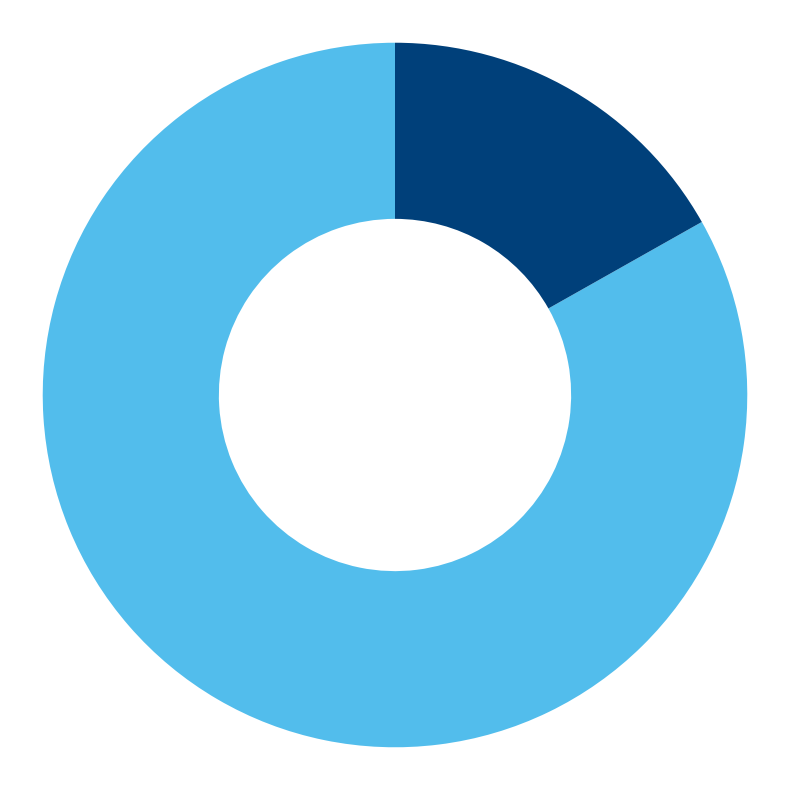


TLS Version Distribution Summary:


,decision,count
0,False,83.173077
1,True,16.826923


In [25]:
if 'result_df' in locals():
    # Set up the figure with one subplot
    fig, ax1 = plt.subplots(1, 1, figsize=(8,8))

    # Donut Chart
    # Create custom legend labels with percentages
    legend_labels = [f"{row['decision']} ({row['count']})" for _, row in result_df.iterrows()]

    # Remove autopct to not show percentages on the chart
    ax1.pie(result_df['count'], labels=None, startangle=90, shadow=False,
           colors=["#52BDEC", "#00407A", "#DD8A2E", "#E63946", "#000000"],
           wedgeprops=dict(width=0.5))

    ax1.axis('equal')
    # ax1.legend(legend_labels, loc='upper right')

    plt.tight_layout()
    plt.show()

    # Display the results in a table
    print("\nTLS Version Distribution Summary:")
    display(result_df)
else:
    print("No valid results available for visualization. Please adjust the queries based on the actual schema.")
